In [1]:
#Imports and preamble
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load data for GDP and remove everything that isn't related to the year 2017
gdp = pd.read_csv("data/gdp-per-capita-worldbank.csv")
gdp_year_not_2017 = gdp[ gdp['Year'] != 2017]
gdp = gdp.drop(gdp_year_not_2017.index, axis=0)



In [3]:
# Load data for Life Expectancy and remove everything that isn't related to the year 2017
le = pd.read_csv("data/life-expectancy.csv")
le_year_not_2017 = le[ le['Year'] != 2017]
le = le.drop(le_year_not_2017.index, axis=0)




In [4]:
# Find countries with life expectancy one standard deviation above the mean (in 2017)
mean = le["Life expectancy (years)"].mean()
std = le["Life expectancy (years)"].std()
le_one_std_above_mean = le[le["Life expectancy (years)"] > mean+std]
print(le_one_std_above_mean[["Entity", "Life expectancy (years)"]].to_latex(index=False))



\begin{tabular}{lr}
\toprule
                     Entity &  Life expectancy (years) \\
\midrule
                    Andorra &                   83.443 \\
                   Anguilla &                   81.568 \\
                  Australia &                   83.122 \\
                    Austria &                   81.340 \\
                    Belgium &                   81.305 \\
                    Bermuda &                   82.316 \\
                     Canada &                   82.210 \\
             Cayman Islands &                   83.633 \\
            Channel Islands &                   82.766 \\
           Falkland Islands &                   81.163 \\
                    Finland &                   81.561 \\
                     France &                   82.432 \\
                    Germany &                   81.039 \\
                     Greece &                   81.901 \\
                 Guadeloupe &                   81.708 \\
                  Hong Kong &     

In [5]:
# Merge GDP with LE
le_gdp = pd.merge(left=gdp, right=le, left_on=["Year", "Code", "Entity"], right_on=["Year", "Code", "Entity"])

In [9]:
# Find countries with high GDP and low Life Expectancy
# As "high" is subjective, we'll here define it has being above mean. "Low" is defined in the opposite manner. You can change the variable num_std to use your own definition of "high".

gdp_mean = le_gdp["GDP per capita (int.-$) (constant 2011 international $)"].mean()
le_mean = le_gdp["Life expectancy (years)"].mean()

countries_with_low_gdp_high_le = le_gdp.loc[(le_gdp["GDP per capita (int.-$) (constant 2011 international $)"] < gdp_mean)
    & (le_gdp["Life expectancy (years)"] > le_mean)]
    
print(countries_with_low_gdp_high_le[["Entity", "GDP per capita (int.-$) (constant 2011 international $)", "Life expectancy (years)"]].to_latex(index=False))


19007.049794276074 20433.952570993995
79.96268169977944
\begin{tabular}{lrr}
\toprule
                 Entity &  GDP per capita (int.-\$) (constant 2011 international \$) &  Life expectancy (years) \\
\midrule
                Albania &                                       11803.430594 &                   78.333 \\
                Algeria &                                       13913.839363 &                   76.499 \\
              Argentina &                                       18933.907147 &                   76.372 \\
                Armenia &                                        8787.579940 &                   74.797 \\
             Azerbaijan &                                       15847.418833 &                   72.693 \\
               Barbados &                                       16978.067686 &                   78.981 \\
                Belarus &                                       17167.967260 &                   74.340 \\
                 Belize &                

In [11]:
# Find countries with high GDP and low life expectancy
countries_with_high_gdp_low_le = le_gdp.loc[(le_gdp["GDP per capita (int.-$) (constant 2011 international $)"] > gdp_mean+(gdp_std))
     & (le_gdp["Life expectancy (years)"] < le_mean)]
print(countries_with_high_gdp_low_le)

Empty DataFrame
Columns: [Entity, Code, Year, GDP per capita (int.-$) (constant 2011 international $), Life expectancy (years)]
Index: []


<function matplotlib.pyplot.show(*args, **kw)>

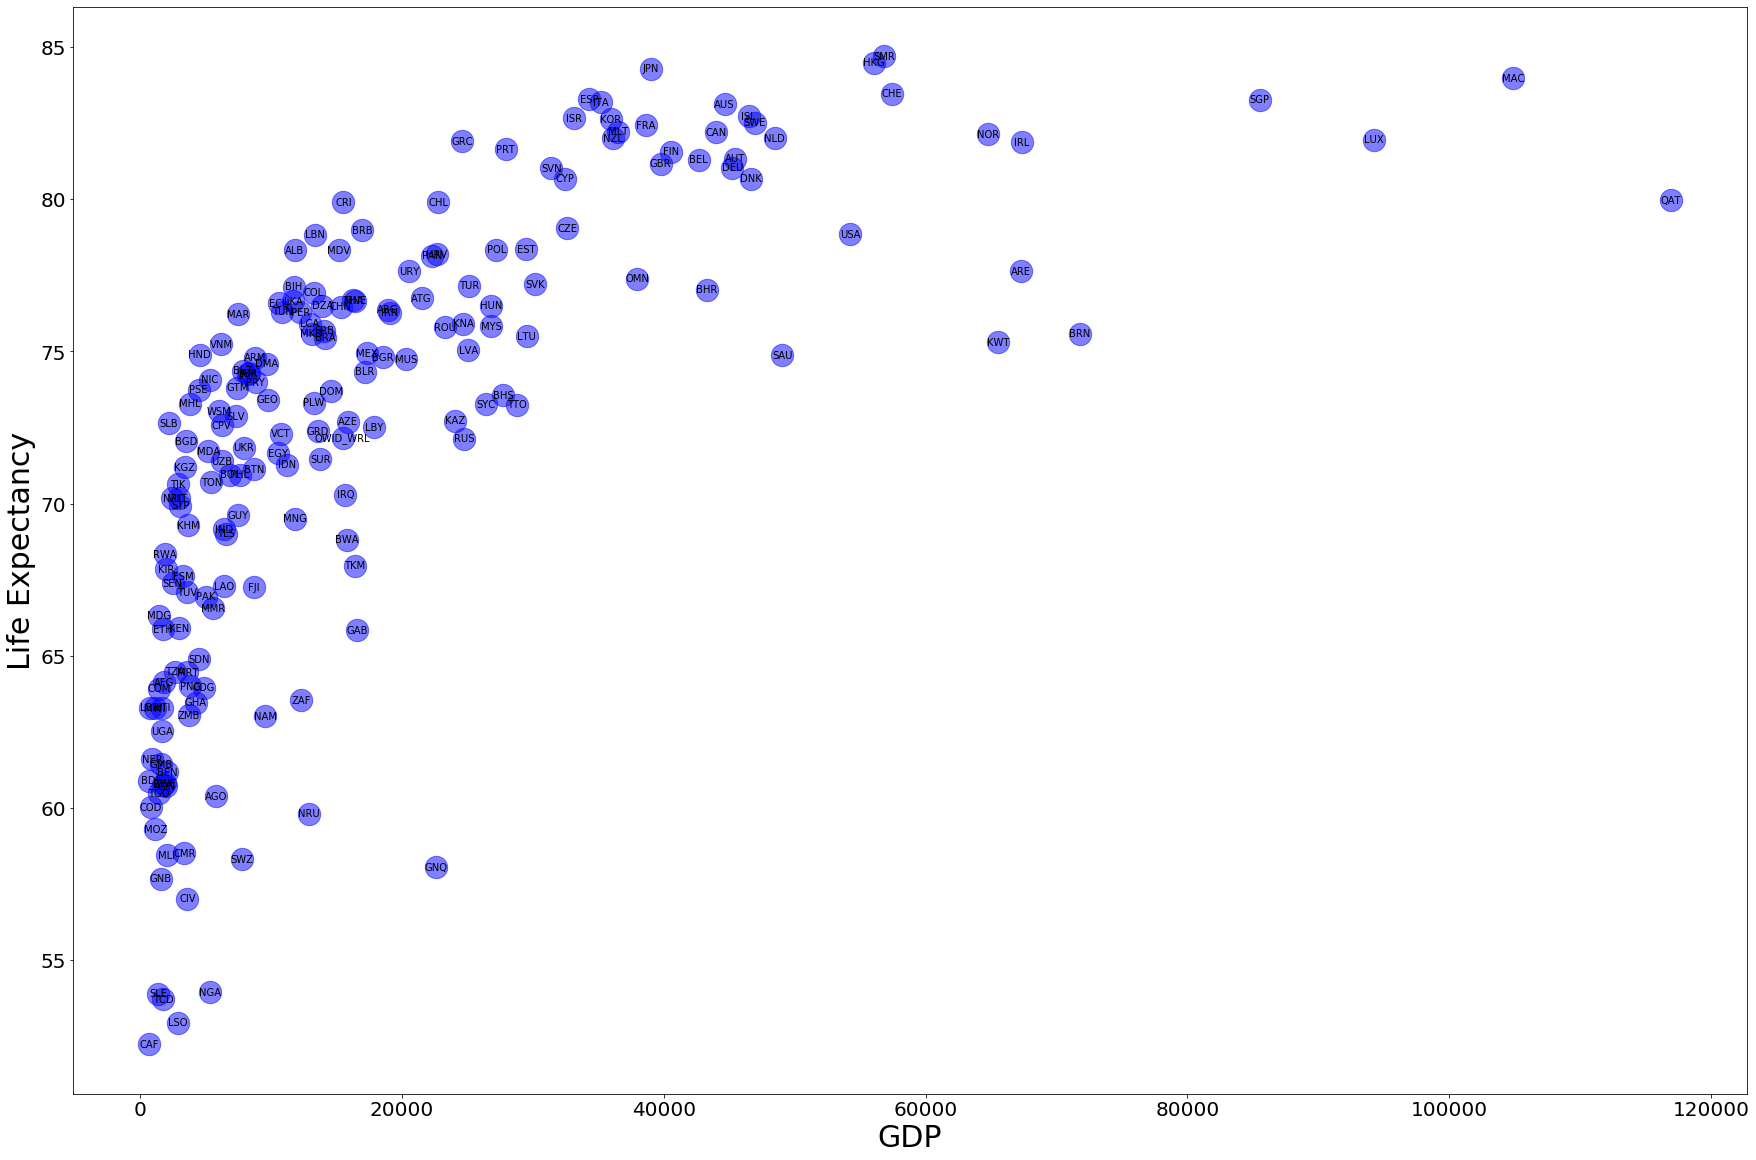

In [8]:
#Make the plot
x = le_gdp["GDP per capita (int.-$) (constant 2011 international $)"]
y = le_gdp["Life expectancy (years)"]

plt.figure(figsize=(30,20))
plt.scatter(x, y, s=500, color="b", alpha=0.5)
plt.xlabel("GDP",fontsize=30)
plt.ylabel("Life Expectancy", fontsize=30)
plt.tick_params(axis="both",which="major",labelsize=20)

#Puts the country code on the points, this for loop takes some time to run
for i, code in enumerate(le_gdp["Code"]):
    plt.annotate(code, (x[i], y[i]), fontsize=10, ha="center", va="center")

plt.show